## Jupyter notebook for plotting the results of the experiments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from enum import Enum
from matplotlib import colors

In [2]:
colors = ['tab:grey', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:brown']

In [3]:
# defines types of agents
class AgentType(Enum):
    DQN = 1
    DQNPR = 2
    RAREID_GRP = 3
    RAREID_RET = 4
    RAREPR_GRP = 5
    RAREPR_RET = 6
    GO_EXPLORE = 7
    
    # for minigrid
    DQN_MG = 8
    DQNPR_MG = 9
    RAREID_GRP_MG = 10
    RAREID_RET_MG = 11
    RAREPR_GRP_MG = 12
    RAREPR_RET_MG = 13
    GO_EXPLORE_MG = 14
    DQN_MG_FAILED = 23
    DQNPR_MG_FAILED = 24
    
    # for ablation study
    REID_GRP = 15
    REID_RET = 16
    REPR_GRP = 17
    REPR_RET = 18
    RAREID_GRP_ABLATION = 19
    RAREID_RET_ABLATION = 20
    RAREPR_GRP_ABLATION = 21
    RAREPR_RET_ABLATION = 22

# retrieves the indices of the given agents from the dataframe
def get_indices_agent(df, agent):
    indices = df["script"] == "false"

    if agent == AgentType.DQN:
        indices = indices | (df["script"] == "learn_dqn") 
    elif agent == AgentType.DQNPR:
        indices = indices | (df["script"] == "learn_dqnpr") 
    elif agent == AgentType.RAREID_GRP:
        indices = indices | ((df["script"] == "learn_rareid") & (df["es_grp"] == True) )
    elif agent == AgentType.RAREID_RET:
        indices = indices | ((df["script"] == "learn_rareid") & (df["es_grp"] == False) )
    elif agent == AgentType.RAREPR_GRP:
        indices = indices | ((df["script"] == "learn_rarepr") & (df["es_grp"] == True) )
    elif agent == AgentType.RAREPR_RET:
        indices = indices | ((df["script"] == "learn_rarepr") & (df["es_grp"] == False) )
    elif agent == AgentType.GO_EXPLORE:
        indices = indices | (df["script"] == "learn_go_explore") 
    
    # for minigrid 
    elif agent == AgentType.DQN_MG:
        indices = indices | ((df["script"] == "learn_dqn") & (df["grps_mean"] > 0.02))  # 0.02 to account for error in evaluation
    elif agent == AgentType.DQNPR_MG:
        indices = indices | ((df["script"] == "learn_dqnpr") & (df["grps_mean"] > 0.02))
    elif agent == AgentType.RAREID_GRP_MG:
        indices = indices | (((df["script"] == "learn_rareid") & (df["es_grp"] == True) )& (df["grps_mean"] > 0.02))
    elif agent == AgentType.RAREID_RET_MG:
        indices = indices | (((df["script"] == "learn_rareid") & (df["es_grp"] == False) )& (df["grps_mean"] > 0.02))
    elif agent == AgentType.RAREPR_GRP_MG:
        indices = indices | (((df["script"] == "learn_rarepr") & (df["es_grp"] == True) )& (df["grps_mean"] > 0.02))
    elif agent == AgentType.RAREPR_RET_MG:
        indices = indices | (((df["script"] == "learn_rarepr") & (df["es_grp"] == False) )& (df["grps_mean"] > 0.02))
    elif agent == AgentType.GO_EXPLORE_MG:
        indices = indices | ((df["script"] == "learn_go_explore") & (df["grps_mean"] > 0.02))
    # for plotting training failed, when we know no agent reached the goal
    elif agent == AgentType.DQN_MG_FAILED:
        indices = indices | (df["script"] == "learn_dqn")
    elif agent == AgentType.DQNPR_MG_FAILED:
        indices = indices | (df["script"] == "learn_dqnpr") 
        
    # for ablation study
    elif agent == AgentType.RAREID_GRP_ABLATION:
        indices = indices | ((df["script"] == "learn_rareid") & (df["es_grp"] == True) & (df["no_regret"] == False))
    elif agent == AgentType.RAREID_RET_ABLATION:
        indices = indices | ((df["script"] == "learn_rareid") & (df["es_grp"] == False) & (df["no_regret"] == False))
    elif agent == AgentType.RAREPR_GRP_ABLATION:
        indices = indices | ((df["script"] == "learn_rarepr") & (df["es_grp"] == True) & (df["no_regret"] == False))
    elif agent == AgentType.RAREPR_RET_ABLATION:
        indices = indices | ((df["script"] == "learn_rarepr") & (df["es_grp"] == False) & (df["no_regret"] == False))
    elif agent == AgentType.REID_GRP:
        indices = indices | ((df["script"] == "learn_rareid") & (df["es_grp"] == True) & (df["no_regret"] == True))
    elif agent == AgentType.REID_RET:
        indices = indices | ((df["script"] == "learn_rareid") & (df["es_grp"] == False) & (df["no_regret"] == True))
    elif agent == AgentType.REPR_GRP:
        indices = indices | ((df["script"] == "learn_rarepr") & (df["es_grp"] == True) & (df["no_regret"] == True))
    elif agent == AgentType.REPR_RET:
        indices = indices | ((df["script"] == "learn_rarepr") & (df["es_grp"] == False) & (df["no_regret"] == True))

    return indices

# gets the names of agent types which are used in the legend
def get_labels_of_agents(agents):   
    labels = []

    for a in agents:
        if a == AgentType.DQN:
            labels.append('DQN')
        elif a == AgentType.DQNPR:
            labels.append('DQNPR')
        elif a == AgentType.RAREID_GRP:
            labels.append('RAREID$^{G}$')
        elif a == AgentType.RAREID_RET:
            labels.append('RAREID$^{R}$')
        elif a == AgentType.RAREPR_GRP:
            labels.append('RAREPR$^{G}$')
        elif a == AgentType.RAREPR_RET:
            labels.append('RAREPR$^{R}$')
        elif a == AgentType.GO_EXPLORE:
            labels.append('Go-Explore')
        
        # for minigrid
        elif a == AgentType.DQN_MG:
            labels.append('DQN')
        elif a == AgentType.DQNPR_MG:
            labels.append('DQNPR')
        elif a == AgentType.RAREID_GRP_MG:
            labels.append('RAREID$^{G}$')
        elif a == AgentType.RAREID_RET_MG:
            labels.append('RAREID$^{R}$')
        elif a == AgentType.RAREPR_GRP_MG:
            labels.append('RAREPR$^{G}$')
        elif a == AgentType.RAREPR_RET_MG:
            labels.append('RAREPR$^{R}$')
        elif a == AgentType.GO_EXPLORE_MG:
            labels.append('Go-Explore')
        elif a == AgentType.DQN_MG_FAILED:
            labels.append('DQN')
        elif a == AgentType.DQNPR_MG_FAILED:
            labels.append('DQNPR')
            
        # for ablation study
        elif a == AgentType.REID_GRP:
            labels.append('REID$^{G}$')
        elif a == AgentType.REID_RET:
            labels.append('REID$^{R}$')
        elif a == AgentType.REPR_GRP:
            labels.append('REPR$^{G}$')
        elif a == AgentType.REPR_RET:
            labels.append('REPR$^{R}$')
        elif a == AgentType.RAREID_GRP_ABLATION:
            labels.append('RAREID$^{G}$')
        elif a == AgentType.RAREID_RET_ABLATION:
            labels.append('RAREID$^{R}$')
        elif a == AgentType.RAREPR_GRP_ABLATION:
            labels.append('RAREPR$^{G}$')
        elif a == AgentType.RAREPR_RET_ABLATION:
            labels.append('RAREPR$^{R}$')

    return labels

# gets the average performance of the best policies across all seeds of the given agent type on the given map
def get_value_agent_map(df, agent, map, column="returns_mean"):
    indices = get_indices_agent(df, agent) & (df["map_name"] == map)

    df_tmp = df[indices].groupby(["hermes_name"]).agg({column: "max"})
    print(agent)
    print(df_tmp[column])
    #print(df_tmp[column].mean())

    return df_tmp[column].mean()

# gets performance of all agent types on all maps
def map_evals(df, agents, maps, column="returns_mean"):
    mapvals_per_agent = []

    for a in agents:
        _map_values = []

        for map_name in maps:
            try:
                value = get_value_agent_map(df, a, map_name, column=column)
            except:
                continue
            _map_values.append(value)

        mapvals_per_agent.append(_map_values)

    return mapvals_per_agent

# plots a bar chart showing the performance of the given agent types on the given maps
def plot_bar_chart(map, column, data, labels, colors, map_labels, offsets, xlim, ylim, ylabel,fontsize=28, figsize=(10, 10), width=0.2):
    plt.figure(figsize = figsize)
    
    width_factor = 8

    for line, label, o, c in zip(data, labels, offsets, colors):
        z = np.array(range(len(line)))
        y = []
        for i in range(len(map_labels)):
            new_value = z[i] + i * 0.2
            y.append(new_value)

        x = np.array(y)

        plt.bar(x + o, line, label = label, linestyle = 'dashed', width = width, color = c)
        for xi, yi in zip(x, line):
            if yi != -1:
                if yi <= 0.01:
                    if column == "grps_mean" or map == "DynObsDoor":
                        plt.text(xi + o - (width/width_factor), 0.025, "training failed", fontsize = fontsize, rotation = 90, color=c) # GRP
                    else:
                        plt.text(xi + o - (width/width_factor), 2, "training failed", fontsize = fontsize, rotation = 90, color=c) # Return
                elif yi < 0.0:
                    plt.text(xi + o - (width/width_factor), 2.5, "{:.2f}".format(yi), fontsize = fontsize, rotation = 90)
                else:
                    if column == "grps_mean" or map == "DynObsDoor":
                        plt.text(xi + o - (width/width_factor), 0.025 if yi < 0.04 else yi+0.025, "{:.2f}".format(yi), fontsize = fontsize, rotation = 90) # GRP
                    else:
                        plt.text(xi + o - (width/width_factor), 0.025 if yi < 0.04 else yi+2.25, "{:.2f}".format(yi), fontsize = fontsize, rotation = 90) # Return


    z = np.array(range(len(map_labels)))
    y = []
    for i in range(len(map_labels)):
        new_value = z[i] + i * 0.2
        y.append(new_value)
    x = np.array(y)

    map_labels = [m.capitalize() for m in map_labels]

    if map_labels[0] == "Dynobsdoor":
        map_labels[0] = "DynObsDoor"
    elif map_labels[0] == "Maze_extended":
        map_labels[0] = "Maze-extended"

    plt.xticks(x, labels = map_labels, fontsize = fontsize)
    
    if not ylim is None:
        plt.ylim(ylim)
    plt.xlim(xlim)
    plt.legend(fontsize = fontsize-10, ncol = 2)
    plt.xticks(fontsize = fontsize)

    if ylim == [0, 100]:
        plt.yticks([0, 20, 40, 60, 80, 100], fontsize = fontsize)
    elif ylim is not None:
        plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize = fontsize)

    plt.ylabel(ylabel, fontsize = fontsize)
    return plt

def plot_map_evals(df, agents, column, maps=None, offsets=[-0.3, -0.1, 0.1, 0.3], xlim=[-1, 1], save_path=None, figsize=(10, 10), width=0.2):
    labels = get_labels_of_agents(agents)

    avg_returns = map_evals(df, agents, maps, column=column)

    ylabel = ""
    ylim = [-50,100]
    if "returns_mean" == column:
        if maps[0] =="DynObsDoor":
            ylim = [0, 1.5]
        else:
            ylim = [0, 100]
        ylabel = "Average Returns"
    elif "grps_mean" == column:
        ylabel = "Average Goal-reaching Probability"
        ylim=[0, 1.5]

    plt = plot_bar_chart(maps[0], column, avg_returns, labels, colors, maps, offsets, xlim=xlim, ylim=ylim , ylabel=ylabel, figsize=figsize, width=width)
    if save_path is not None:
        fig_name = column + ".png"
        plt.savefig(save_path+fig_name, dpi=300, bbox_inches='tight',pad_inches=0.05)
    plt.show()


## Generate plots

AgentType.DQN
hermes_name
2023_11_29_102455280639_0_00000    0.873
2023_11_29_102455281087_1_00000    0.899
Name: grps_mean, dtype: float64
AgentType.DQN
hermes_name
2023_12_10_103550676902_0_3a621    0.737
2023_12_10_103550676967_1_3a621    0.000
2023_12_10_103550677042_2_3a621    0.000
Name: grps_mean, dtype: float64
AgentType.DQN
hermes_name
2023_11_29_105324120974_6_00000    0.0
2023_11_29_105412607764_7_00000    0.0
2023_11_29_121804788880_8_00000    0.0
Name: grps_mean, dtype: float64
AgentType.DQNPR
hermes_name
2023_11_29_122127142798_9_00000     0.868
2023_11_29_135700722628_10_00000    0.896
2023_11_29_140354977388_11_00000    0.880
Name: grps_mean, dtype: float64
AgentType.DQNPR
hermes_name
2023_12_10_103550677163_3_3a621    0.000
2023_12_10_103550677300_4_3a621    0.000
2023_12_10_103550677379_5_3a621    0.465
Name: grps_mean, dtype: float64
AgentType.DQNPR
hermes_name
2023_11_29_154913484574_15_00000    0.0
2023_11_29_203954577889_16_00000    0.0
2023_11_29_204322046793_17_

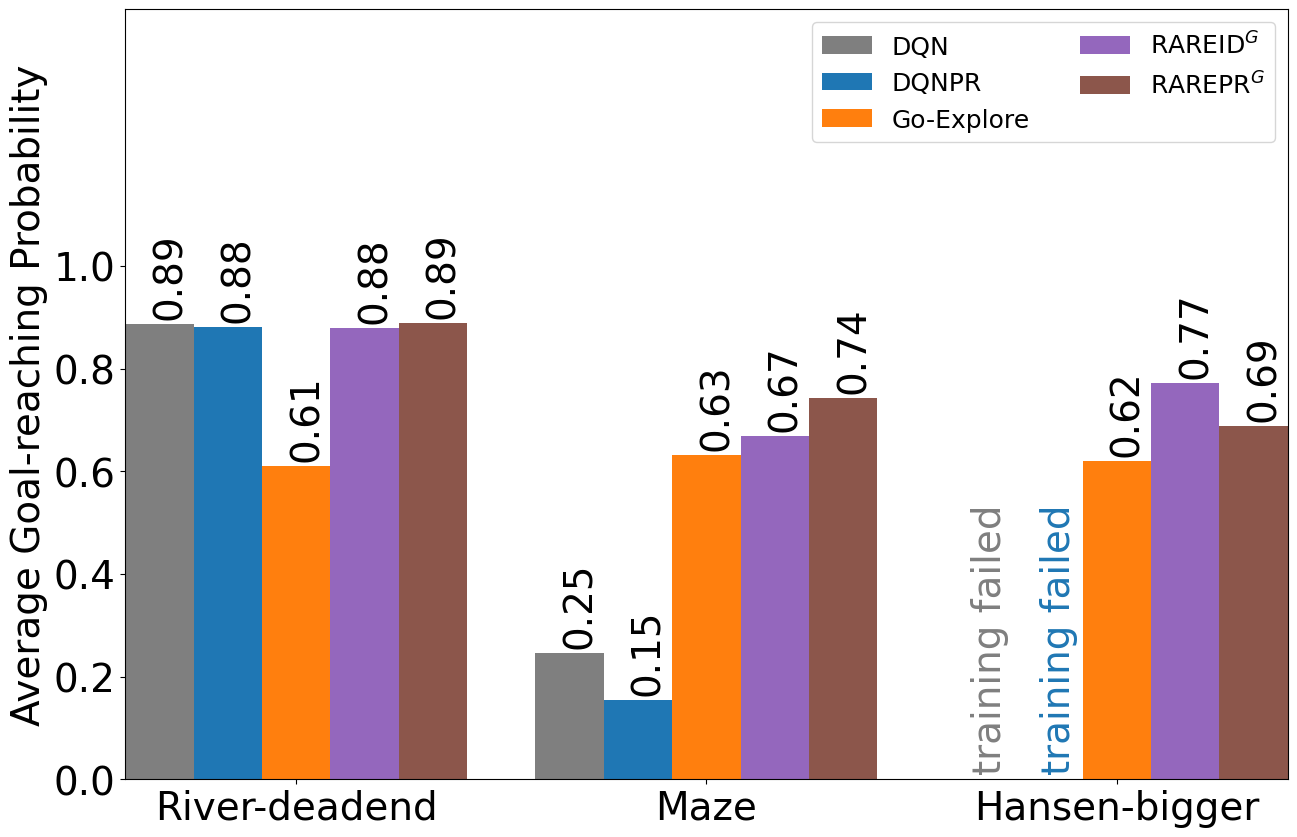

In [4]:
'''
RACETRACK GRP
'''

df_rt_grp = pd.read_csv("../results/racetrack/racetrack_grp.csv")

# plot can be automatically saved to the experiment folder
save_path = None

# define which agents and maps we are interested
agents = [AgentType.DQN, AgentType.DQNPR, AgentType.GO_EXPLORE, AgentType.RAREID_GRP, AgentType.RAREPR_GRP]
maps = ["river-deadend", "maze", "hansen-bigger"]

# create the plot, column defines the evaluation metric, set offsets according to the number of agents and desired width of the plot
plot_map_evals(df_rt_grp, agents, column="grps_mean", maps=maps, save_path=save_path, offsets=[-0.4, -0.2, 0.0, 0.2, 0.4], xlim=[-0.5, 2.9], figsize=(15, 10), width=0.2)

AgentType.DQN
hermes_name
2023_11_29_102455280639_0_00000    71.618
2023_11_29_102455281087_1_00000    74.813
Name: returns_mean, dtype: float64
AgentType.DQN
hermes_name
2023_12_10_103550676902_0_3a621    34.410
2023_12_10_103550676967_1_3a621    -4.587
2023_12_10_103550677042_2_3a621    -4.333
Name: returns_mean, dtype: float64
AgentType.DQN
hermes_name
2023_11_29_105324120974_6_00000   -2.102
2023_11_29_105412607764_7_00000   -2.244
2023_11_29_121804788880_8_00000   -1.941
Name: returns_mean, dtype: float64
AgentType.DQNPR
hermes_name
2023_11_29_122127142798_9_00000     69.108
2023_11_29_135700722628_10_00000    73.005
2023_11_29_140354977388_11_00000    72.031
Name: returns_mean, dtype: float64
AgentType.DQNPR
hermes_name
2023_12_10_103550677163_3_3a621    -3.915
2023_12_10_103550677300_4_3a621    -3.842
2023_12_10_103550677379_5_3a621    14.044
Name: returns_mean, dtype: float64
AgentType.DQNPR
hermes_name
2023_11_29_154913484574_15_00000   -3.719
2023_11_29_203954577889_16_00000 

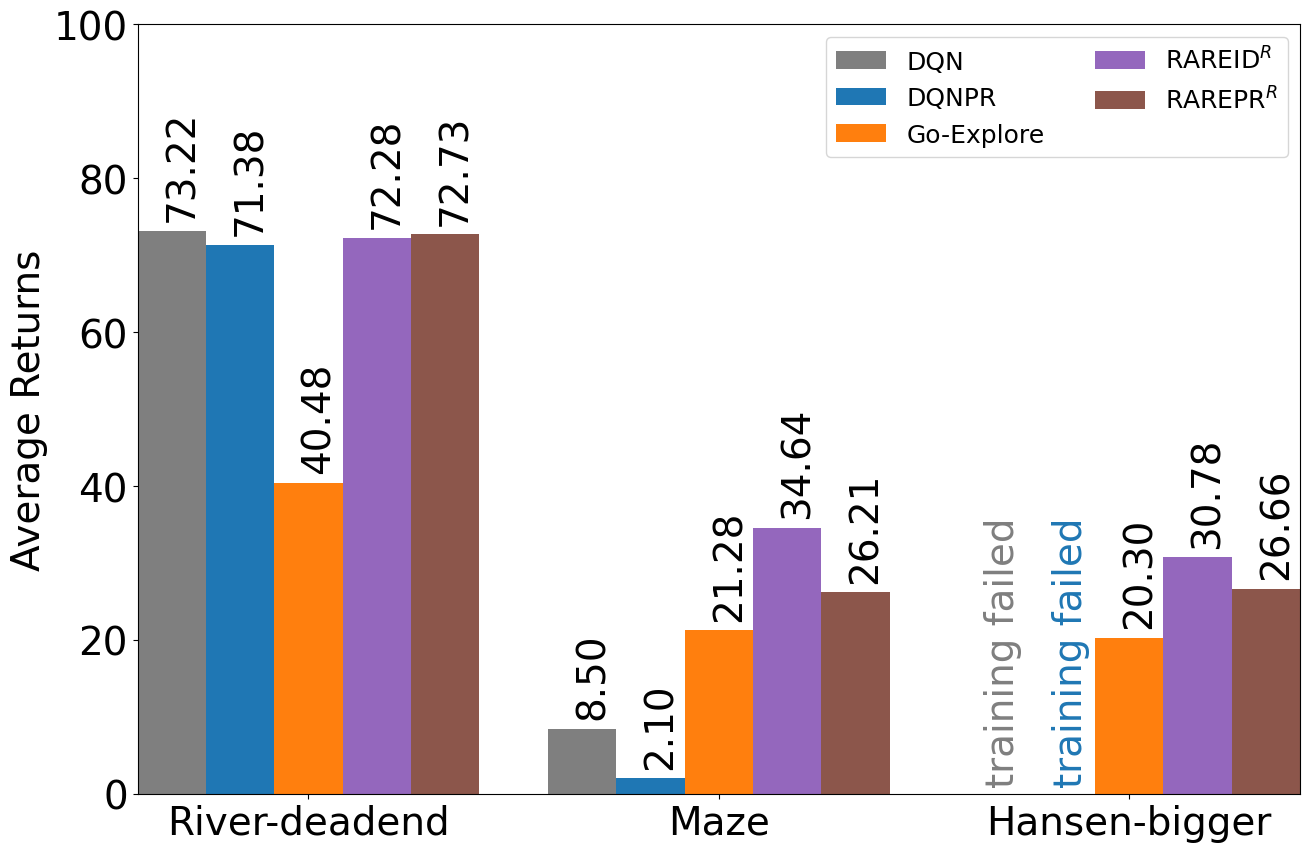

In [5]:
'''
RACETRACK RETURN
'''

df_rt_ret = pd.read_csv("../results/racetrack/racetrack_ret.csv")

# plot can be automatically saved to the experiment folder
save_path = None

# define which agents and maps we are interested
agents = [AgentType.DQN, AgentType.DQNPR, AgentType.GO_EXPLORE, AgentType.RAREID_RET, AgentType.RAREPR_RET]
maps = ["river-deadend", "maze", "hansen-bigger"]

# create the plot, column defines the evaluation metric, set offsets according to the number of agents and desired width of the plot
plot_map_evals(df_rt_ret, agents, column="returns_mean", maps=maps, save_path=save_path, offsets=[-0.4, -0.2, 0.0, 0.2, 0.4], xlim=[-0.5, 2.9], figsize=(15, 10), width=0.2)

AgentType.DQN_MG_FAILED
hermes_name
2023_12_05_072908978625_0_00000    0.0
2023_12_05_072908979522_2_00000    0.0
Name: grps_mean, dtype: float64
AgentType.DQNPR_MG_FAILED
hermes_name
2023_12_11_120936695825_0_00000    0.000
2023_12_11_120936696145_1_00000    0.000
2023_12_11_120936696754_2_00000    0.001
Name: grps_mean, dtype: float64
AgentType.GO_EXPLORE_MG
hermes_name
2023_12_18_131908413096_0_2e913    0.224
2023_12_18_131908413229_2_2e913    0.772
Name: grps_mean, dtype: float64
AgentType.RAREID_GRP_MG
hermes_name
2023_12_16_152113214764_0_00000    0.048
2023_12_16_152113215720_2_00000    0.991
2023_12_17_004138173357_6_00000    0.701
2023_12_17_021956707117_7_00000    0.148
2023_12_17_044011817383_8_00000    0.892
Name: grps_mean, dtype: float64
AgentType.RAREPR_GRP_MG
hermes_name
2023_12_18_092445271420_0_00000     0.727
2023_12_18_092445271912_1_00000     1.000
2023_12_18_092445272457_2_00000     0.092
2023_12_18_092445272835_3_00000     0.968
2023_12_18_092445273600_5_00000   

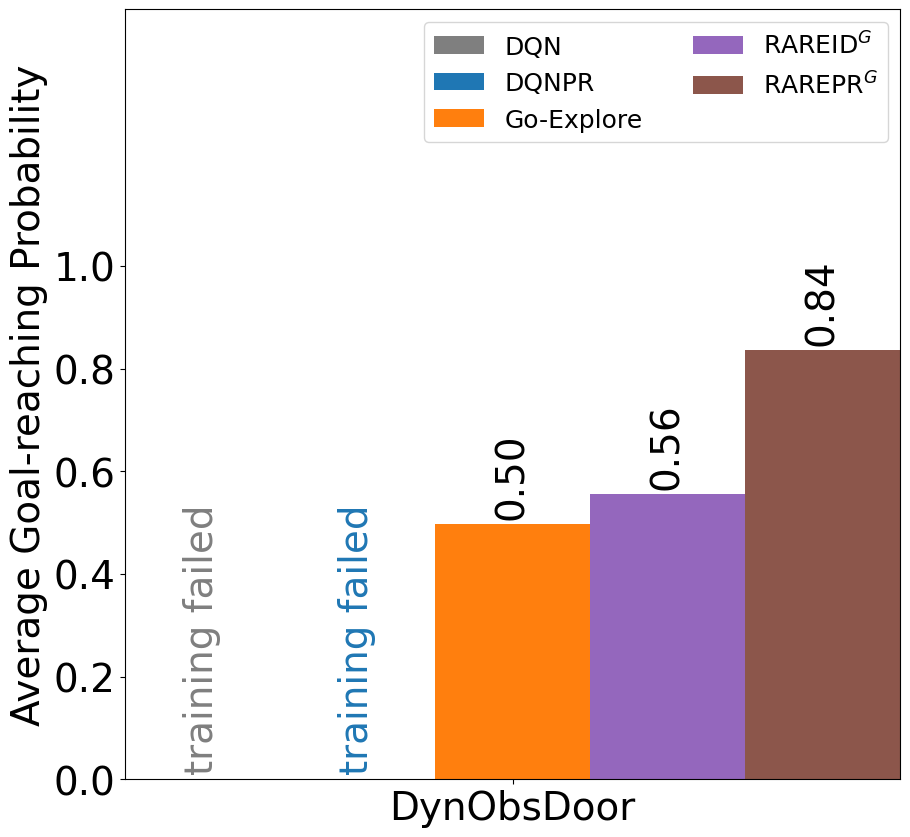

In [6]:
'''
MINIGRID GRP
'''

df_mg_grp = pd.read_csv("../results/minigrid/minigrid_grp.csv")

# plot can be automatically saved to the experiment folder
save_path = None

# define which agents and maps we are interested
agents = [AgentType.DQN_MG_FAILED, AgentType.DQNPR_MG_FAILED, AgentType.GO_EXPLORE_MG, AgentType.RAREID_GRP_MG, AgentType.RAREPR_GRP_MG]
maps = ["DynObsDoor"]

# create the plot, column defines the evaluation metric, set offsets according to the number of agents and desired width of the plot
plot_map_evals(df_mg_grp, agents, column="grps_mean", maps=maps, save_path=save_path, offsets=[-0.4, -0.2, 0.0, 0.2, 0.4], xlim=[-0.5, 0.5], figsize=(10,10), width=0.2)

AgentType.DQN_MG_FAILED
hermes_name
2023_12_05_072908978625_0_00000    0.0
2023_12_05_072908979522_2_00000    0.0
Name: returns_mean, dtype: float64
AgentType.DQNPR_MG_FAILED
hermes_name
2023_12_11_120936695825_0_00000   -0.001
2023_12_11_120936696145_1_00000    0.000
2023_12_11_120936696754_2_00000    0.000
Name: returns_mean, dtype: float64
AgentType.GO_EXPLORE_MG
hermes_name
2023_12_18_131908413096_0_2e913   -0.006
2023_12_18_131908413229_2_2e913    0.180
Name: returns_mean, dtype: float64
AgentType.RAREID_RET_MG
hermes_name
2023_12_18_091754623081_0_00000     0.004
2023_12_18_091754623548_1_00000     0.258
2023_12_18_091754624107_2_00000     0.473
2023_12_18_091754624732_3_00000     0.535
2023_12_18_091754626589_5_00000     0.471
2023_12_18_185220159375_7_00000     0.340
2023_12_18_193320184209_9_00000     0.560
2023_12_18_195335274442_10_00000    0.534
2023_12_18_195720530208_11_00000    0.300
Name: returns_mean, dtype: float64
AgentType.RAREPR_RET_MG
hermes_name
2023_12_19_081354

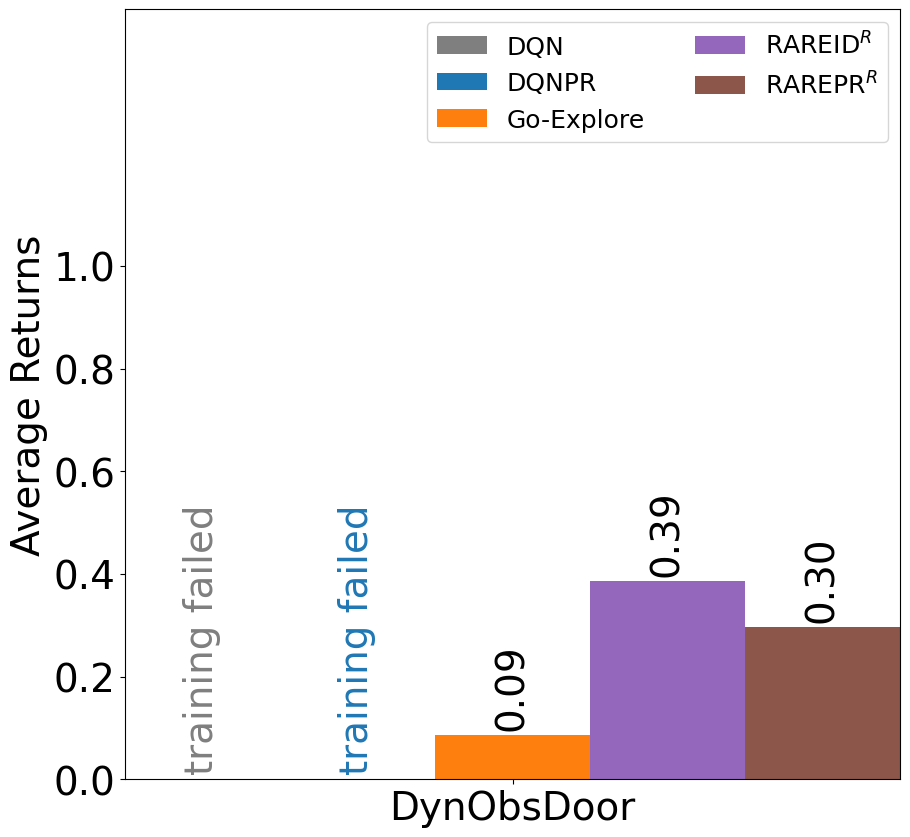

In [7]:
'''
MINIGRID RETURN
'''

df_mg_ret = pd.read_csv("../results/minigrid/minigrid_ret.csv")

# plot can be automatically saved to the experiment folder
save_path = None

# define which agents and maps we are interested
agents = [AgentType.DQN_MG_FAILED, AgentType.DQNPR_MG_FAILED, AgentType.GO_EXPLORE_MG, AgentType.RAREID_RET_MG, AgentType.RAREPR_RET_MG]
maps = ["DynObsDoor"]

# create the plot, column defines the evaluation metric, set offsets according to the number of agents and desired width of the plot
plot_map_evals(df_mg_ret, agents, column="returns_mean", maps=maps, save_path=save_path, offsets=[-0.4, -0.2, 0.0, 0.2, 0.4], xlim=[-0.5, 0.5], figsize=(10,10), width=0.2)

AgentType.REID_GRP
hermes_name
2023_12_11_041204385998_12_3a621    0.734
2023_12_11_041700853717_13_3a621    0.009
2023_12_11_043534203281_14_3a621    0.009
2023_12_11_044531486853_15_3a621    0.718
2023_12_11_054101243960_16_3a621    0.711
2023_12_11_055313617259_17_3a621    0.006
2023_12_11_061115364148_18_3a621    0.713
2023_12_11_063446396907_19_3a621    0.742
2023_12_11_071410537791_20_3a621    0.729
2023_12_11_072628173467_21_3a621    0.665
2023_12_11_092534365092_22_3a621    0.750
2023_12_11_095531724304_23_3a621    0.743
Name: grps_mean, dtype: float64
AgentType.RAREID_GRP_ABLATION
hermes_name
2023_12_11_203128753694_12_3a621    0.755
2023_12_11_203854430347_13_3a621    0.725
2023_12_11_205631846924_14_3a621    0.739
2023_12_11_205800936279_15_3a621    0.746
2023_12_11_215054572742_16_3a621    0.499
2023_12_11_215834275160_17_3a621    0.628
2023_12_11_224217006101_18_3a621    0.716
2023_12_11_235931677453_19_3a621    0.000
2023_12_12_004133298439_20_3a621    0.754
2023_12_12_00

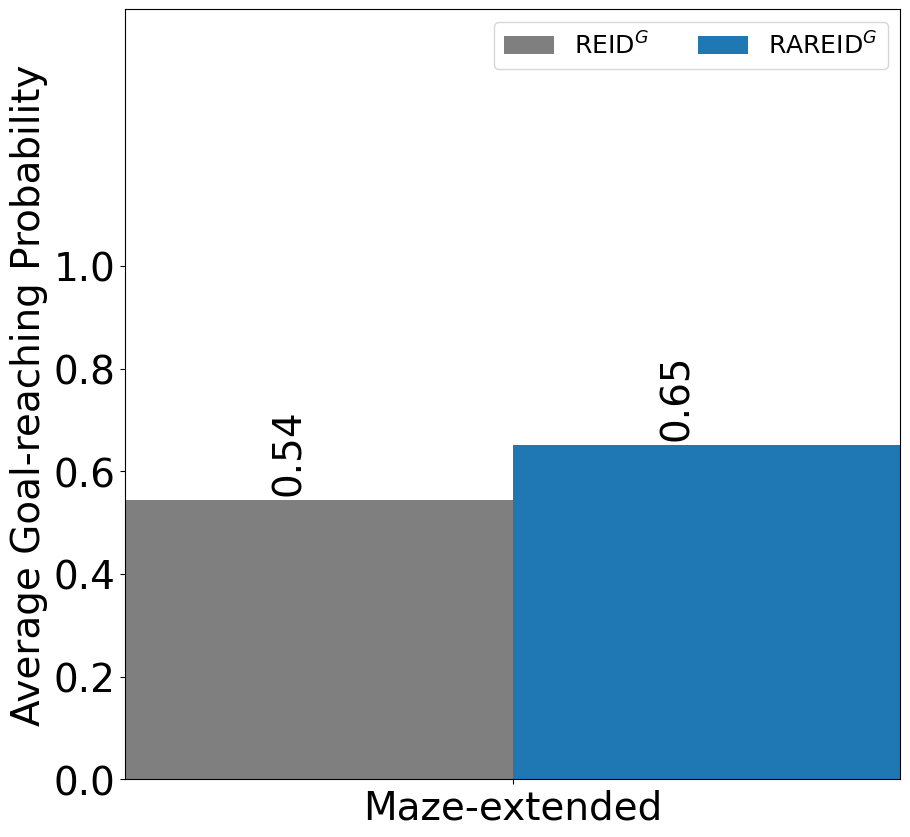

In [10]:
'''
ABLATION GRP NO RAREPR
'''

res_ablation = "../results/ablation/ablation_combi/experiments/res.csv"
df_ablation = pd.read_csv(Path(res_ablation))

res_ablation_regret = "../results/ablation/ablation_combi_regret/experiments/res.csv"
df_ablation_regret = pd.read_csv(Path(res_ablation_regret))

df_ablation_grp = pd.concat([df_ablation, df_ablation_regret], ignore_index=True)

# plot can be automatically saved to the experiment folder
save_path = None

# define which agents and maps we are interested
agents = [AgentType.REID_GRP, AgentType.RAREID_GRP_ABLATION]
maps = ["maze_extended"]

# create the plot, column defines the evaluation metric, set offsets according to the number of agents and desired width of the plot
plot_map_evals(df_ablation_grp, agents, column="grps_mean", maps=maps, save_path=save_path, offsets=[-0.2, 0.2], xlim=[-0.4, 0.4], figsize=(10,10), width=0.4)

AgentType.REID_RET
hermes_name
2023_12_13_013909830416_12_3a621    35.903
2023_12_13_015333188985_13_3a621    -4.659
2023_12_13_030521217762_14_3a621    30.345
2023_12_13_031034354397_15_3a621    -4.038
2023_12_13_041051090151_16_3a621    19.751
2023_12_13_041701754257_17_3a621    -4.280
2023_12_13_041931139730_18_3a621    12.827
2023_12_13_042033761473_19_3a621    32.267
2023_12_13_050212708739_20_3a621    35.885
2023_12_13_051716314907_21_3a621    38.226
2023_12_13_052645929414_22_3a621    34.957
2023_12_13_060738165887_23_3a621    31.929
Name: returns_mean, dtype: float64
AgentType.RAREID_RET_ABLATION
hermes_name
2023_12_13_144319289900_12_2e913    41.480
2023_12_13_144750542409_13_2e913    37.914
2023_12_13_155818113595_14_2e913    38.199
2023_12_13_160501153914_15_2e913    33.279
2023_12_13_165712090703_16_2e913    36.965
2023_12_13_170220886548_17_2e913    36.353
2023_12_13_171108326640_18_2e913    36.812
2023_12_13_172728968965_19_2e913    36.643
2023_12_13_173726861685_20_2e913

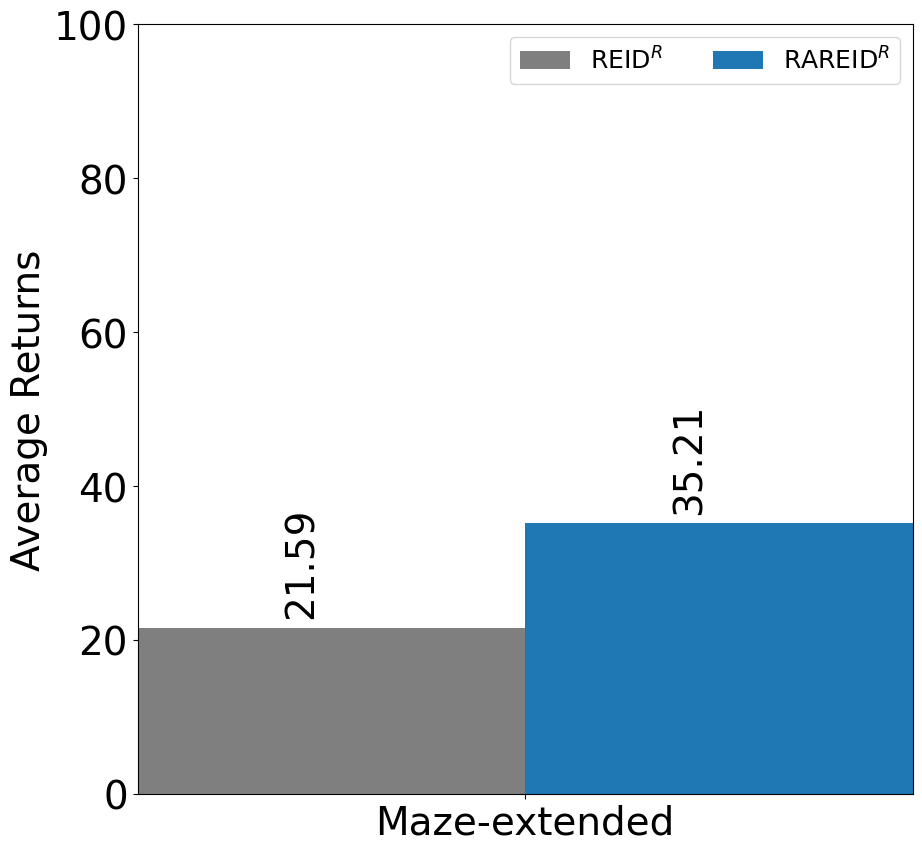

In [11]:
'''
ABLATION RETURN NO RAREPR
'''

res_ablation = "../results/ablation/ablation_combi_ret/experiments/res.csv"
df_ablation = pd.read_csv(Path(res_ablation))

res_ablation_regret = "../results/ablation/ablation_combi_ret_regret/experiments/res.csv"
df_ablation_regret = pd.read_csv(Path(res_ablation_regret))

df_ablation_ret = pd.concat([df_ablation, df_ablation_regret], ignore_index=True)

# plot can be automatically saved to the experiment folder
save_path = None

# define which agents and maps we are interested
agents = [AgentType.REID_RET, AgentType.RAREID_RET_ABLATION]
maps = ["maze_extended"]

# create the plot, column defines the evaluation metric, set offsets according to the number of agents and desired width of the plot
plot_map_evals(df_ablation_ret, agents, column="returns_mean", maps=maps, save_path=save_path, offsets=[-0.2, 0.2], xlim=[-0.4, 0.4], figsize=(10,10), width=0.4)